In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load DataSet

In [27]:
home = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/funnel/home_page_table.csv')
user = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/funnel/user_table.csv', parse_dates =['date'])
payment = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/funnel/payment_page_table.csv')
search = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/funnel/search_page_table.csv')
payConfirm = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/funnel/payment_confirmation_table.csv')

In [28]:
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [29]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [30]:
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [31]:
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [32]:
payConfirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [33]:
search.shape,payment.shape,payConfirm.shape, user.shape, home.shape

((45200, 2), (6030, 2), (452, 2), (90400, 4), (90400, 2))

# Data Processing

In [34]:
# Merge all the tables
data = pd.merge(user,home,on='user_id',how = 'left')
data = pd.merge(data,search,on = 'user_id',how = 'left', suffixes=('_home','_search'))
data = pd.merge(data,payment,on = 'user_id',how = 'left')
data = pd.merge(data,payConfirm,on = 'user_id',how = 'left', suffixes=('_pay','_payConfm'))

data.head()



,user_id,date,device,sex,page_home,page_search,page_pay,page_payConfm
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [35]:
data.loc[data.page_payConfm.notnull()].head(5)

,user_id,date,device,sex,page_home,page_search,page_pay,page_payConfm
61,13830,2015-02-05,Desktop,Male,home_page,search_page,payment_page,payment_confirmation_page
261,559850,2015-02-11,Mobile,Female,home_page,search_page,payment_page,payment_confirmation_page
402,638114,2015-01-09,Mobile,Female,home_page,search_page,payment_page,payment_confirmation_page
412,581956,2015-02-25,Mobile,Male,home_page,search_page,payment_page,payment_confirmation_page
785,337704,2015-01-31,Desktop,Male,home_page,search_page,payment_page,payment_confirmation_page


In [36]:
data.user_id.nunique()

90400

## There is only one record per user and no duplicates

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id          90400 non-null int64
date             90400 non-null datetime64[ns]
device           90400 non-null object
sex              90400 non-null object
page_home        90400 non-null object
page_search      45200 non-null object
page_pay         6030 non-null object
page_payConfm    452 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.2+ MB


# Analysis

## 1. Analysis on Device

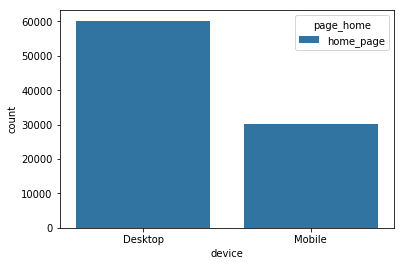

In [38]:
plt.figure()
sns.countplot('device', hue='page_home',data=data)
plt.show()

### Looks like Desktop users visiting home page are approximately 50% more than Mobile users

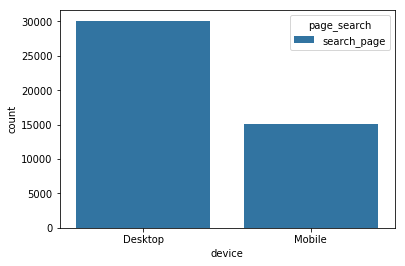

In [39]:
plt.figure()
sns.countplot('device', hue='page_search',data=data)
plt.show()

### Looks like Desktop users visiting search page are approximately 50% more than Mobile users

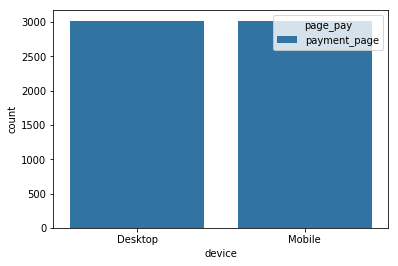

In [40]:
plt.figure()
sns.countplot('device', hue='page_pay',data=data)
plt.show()

### Looks like both Desktop and Mobile users visit payment page equally.

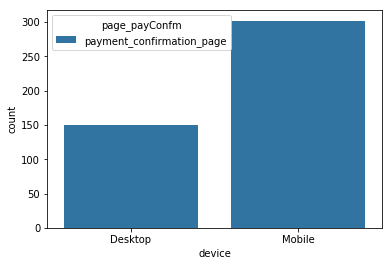

In [41]:
plt.figure()
sns.countplot('device', hue='page_payConfm',data=data)
plt.show()

### 1. It seems 50% more mobile users land up buying a product when compared to desktop users.
### 2. Though almost equal number of users from Desktop and mobile land up on payment page. Desktop users who end up buying a product have reduced.

## 2. Analysis on Sex 

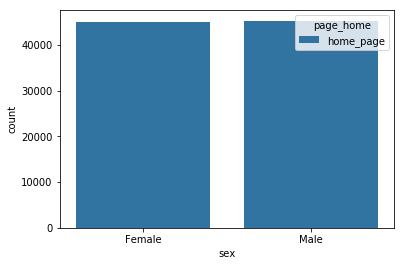

In [42]:
plt.figure()
sns.countplot('sex', hue='page_home',data=data)
plt.show()

### Looks like almost equal number of male and female users visit home page.

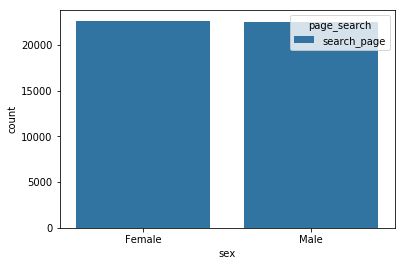

In [43]:
plt.figure()
sns.countplot('sex', hue='page_search',data=data)
plt.show()

### Looks like almost equal number of male and female users visit search page.

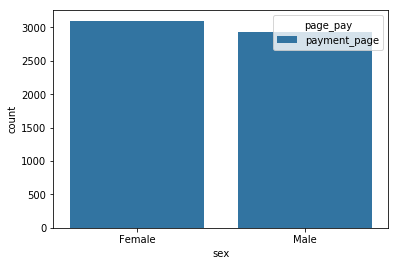

In [44]:
plt.figure()
sns.countplot('sex', hue='page_pay',data=data)
plt.show()

### Looks like male users visiting payment page have come down a little compared to female users.

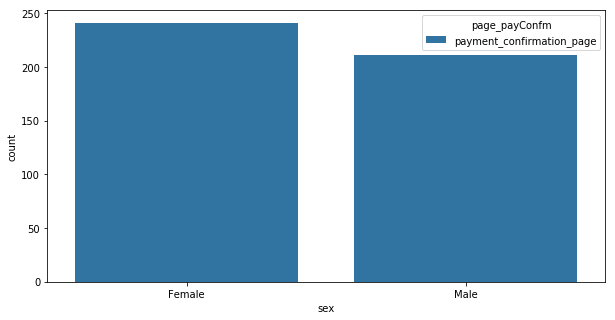

In [45]:
plt.figure(figsize=(10,5))
sns.countplot('sex', hue='page_payConfm',data=data)
plt.show()

### Looks like female users landing on payment confirmation page are more than male users.

## Device preferance among Males and Females

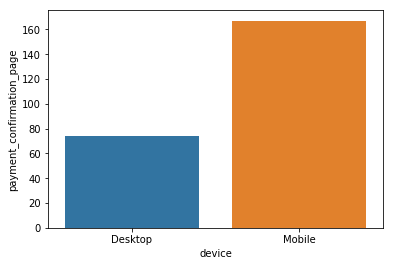

In [47]:
fem =data[data['sex']=='Female'].groupby('device')['page_payConfm'].value_counts().unstack()

plt.figure()
sns.barplot(x=fem.index, y=fem.payment_confirmation_page)
plt.show()

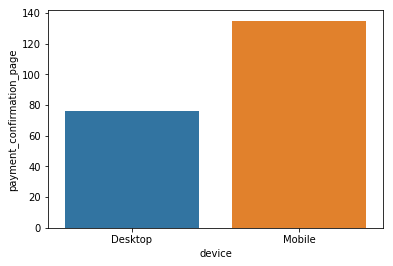

In [83]:
male =data[data['sex']=='Male'].groupby('device')['page_payConfm'].value_counts().unstack()

plt.figure()
sns.barplot(x=male.index, y = male.payment_confirmation_page)
plt.show()

### The above graph shows that Mobile device users are more likely to buy a product

In [49]:
data['week'] = data.date.dt.week
data.head()

,user_id,date,device,sex,page_home,page_search,page_pay,page_payConfm,week
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,9
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,3
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,15
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,8
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,3


## Week distribution

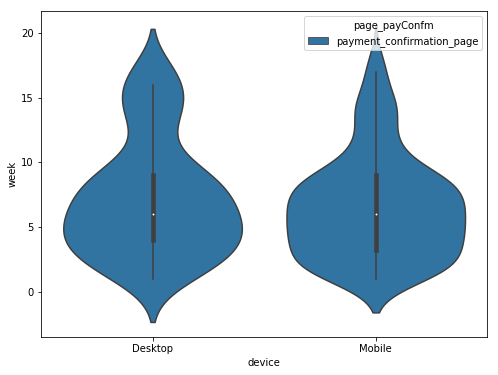

In [51]:
plt.figure(figsize = (8,6))
sns.violinplot(x='device', y ='week', hue='page_payConfm', data = data)
plt.show()

### Looks like more products are bought during the early weeks than later

## Page Visited Statistics

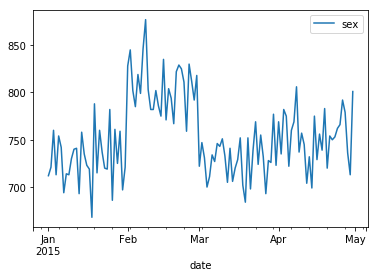

In [11]:
data.groupby('date').agg({'sex':len}).plot()

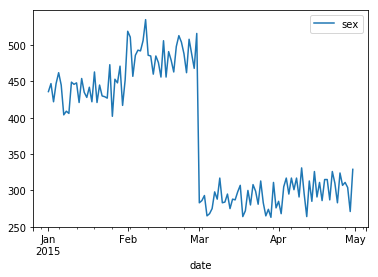

In [13]:
data.loc[data.page_search.notnull()].groupby('date').agg({'sex':len}).plot()

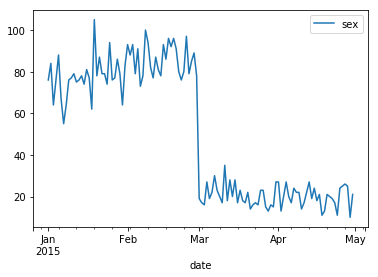

In [14]:
data.loc[data.page_pay.notnull()].groupby('date').agg({'sex':len}).plot()

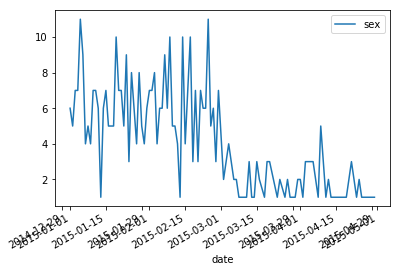

In [12]:
data.loc[data.page_payConfm.notnull()].groupby('date').agg({'sex':len}).plot()

### People visiting from home page to confirmation page have gradually decreased

# Answer question 1
## A full picture of funnel conversion rate for both desktop and mobile

In [52]:
# Add column converted if the user has bought the product
data['converted'] = (data.page_payConfm == 'payment_confirmation_page').astype(int)
data.head()

,user_id,date,device,sex,page_home,page_search,page_pay,page_payConfm,week,converted
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,9,0
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,3,0
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,15,0
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,8,0
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,3,0


In [165]:
conversion_Rate = 1- pd.DataFrame(data.isnull().sum()).rename(columns={0: 'conversion'}) / len(data)
conversion_Rate.reset_index(inplace=True)
conversion_Rate[4:8]

,index,conversion
4,page_home,1.000000
5,page_search,0.500000
6,page_pay,0.066704
7,page_payConfm,0.005000


## 1. Overall Conversion Rate

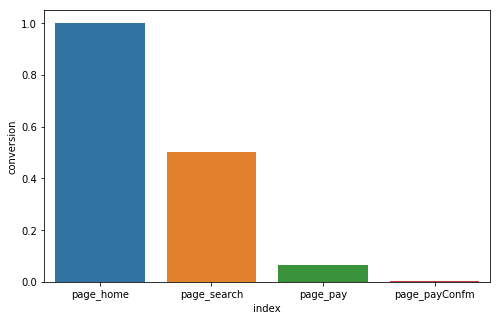

In [168]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='index', y='conversion', data=conversion_Rate[4:8], ax=ax)
plt.show()

### Impact of Sex


In [176]:
df=data.groupby(['device','sex'])['page_payConfm'].value_counts().unstack()
df

page_payConfm   payment_confirmation_page
device  sex                              
Desktop Female                         74
        Male                           76
Mobile  Female                        167
        Male                          135

In [177]:
df['convrsn_rate'] = (df.payment_confirmation_page)/len(data)
df.head()

page_payConfm   payment_confirmation_page  convrsn_rate
device  sex                                            
Desktop Female                         74      0.000819
        Male                           76      0.000841
Mobile  Female                        167      0.001847
        Male                          135      0.001493

### The max conversion rate is from female users using mobile device, and the least is from the female desktop users. 

# Answer question 2
### Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

In [184]:
#Analysis on Date
X = data.copy()
X.head()

,user_id,date,device,sex,page_home,page_search,page_pay,page_payConfm,week,converted
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,9,0
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,3,0
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,15,0
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,8,0
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,3,0


In [187]:
X['mobile'] =(X.device == 'Mobile').astype(int)

In [ ]:
X['female'] = (X.sex == 'Female').astype(int)

In [201]:
#del X['page_pay']
#del X['date']

In [190]:
X.date.describe()

count                   90400
unique                    120
top       2015-02-08 00:00:00
freq                      877
first     2015-01-01 00:00:00
last      2015-04-30 00:00:00
Name: date, dtype: object

In [203]:
X['weekday']= X.date.dt.weekday_name
X.head()

,user_id,converted,mobile,weekday
0,450007,0,0,Saturday
1,756838,0,0,Tuesday
2,568983,0,0,Thursday
3,190794,0,0,Wednesday
4,537909,0,0,Thursday


In [204]:
X.groupby('weekday')['converted'].agg(['count','mean']).sort_values('mean',ascending=False).reset_index()
#X.head()

,weekday,count,mean
0,Monday,12955,0.005944
1,Saturday,12801,0.005468
2,Tuesday,12697,0.005434
3,Thursday,13444,0.004909
4,Sunday,12922,0.004798
5,Friday,12750,0.004235
6,Wednesday,12831,0.004209


### Not very significan difference on sales over the week.

In [207]:
# get dummy variables
X=pd.get_dummies(X,prefix='',prefix_sep='')
X.head()

,user_id,converted,mobile,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,450007,0,0,0,0,1,0,0,0,0
1,756838,0,0,0,0,0,0,0,1,0
2,568983,0,0,0,0,0,0,1,0,0
3,190794,0,0,0,0,0,0,0,0,1
4,537909,0,0,0,0,0,0,1,0,0


In [208]:
y = X['converted']

In [214]:
X = X.loc[:,X.columns != 'converted']

In [215]:
X.head()

,user_id,mobile,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,450007,0,0,0,1,0,0,0,0
1,756838,0,0,0,0,0,0,1,0
2,568983,0,0,0,0,0,1,0,0
3,190794,0,0,0,0,0,0,0,1
4,537909,0,0,0,0,0,1,0,0


In [218]:
del X['Tuesday']#redundant feature

In [220]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=20,min_samples_split=20)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [224]:
export_graphviz(dt,feature_names=X.columns,class_names=['NotConvert','Converted'],
                proportion=True,leaves_parallel=True,filled=True)

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\ngraph [ranksep=equally, splines=polyline] ;\n0 [label="mobile <= 0.5\\ngini = 0.01\\nsamples = 100.0%\\nvalue = [0.995, 0.005]\\nclass = NotConvert", fillcolor="#e58139fe"] ;\n1 [label="user_id <= 998447.0\\ngini = 0.005\\nsamples = 66.6%\\nvalue = [0.998, 0.002]\\nclass = NotConvert", fillcolor="#e58139fe"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="user_id <= 950704.5\\ngini = 0.005\\nsamples = 66.5%\\nvalue = [0.998, 0.002]\\nclass = NotConvert", fillcolor="#e58139fe"] ;\n1 -> 2 ;\n3 [label="gini = 0.005\\nsamples = 63.4%\\nvalue = [0.997, 0.003]\\nclass = NotConvert", fillcolor="#e58139fe"] ;\n2 -> 3 ;\n4 [label="gini = 0.002\\nsamples = 3.1%\\nvalue = [0.999, 0.001]\\nclass = NotConvert", fillcolor="#e58139ff"] ;\n2 -> 4 ;\n5 [label="user_id <= 998825.5\\ngini = 0.021\\nsamples = 0.1%\\nvalue = [0.989, 0.011]\\nclass = NotConvert", fillcolor="#e58139fc"] ;\n1 -> 5 ;\n6 [label="gini

# Conclusions

## 1. The desktop users landing on payment page are not buying the product. The marketing team can look at the desktop application and see if there is any issues with the rendering of confirmation page on desktop or make it more user friendly.
## 2. Since both male and female users end up buying products on mobile, the marketing team can launch promotion for mobile users and also work on improving the user experience of mobile app.